In [10]:
# You can use any Python source file as a module by executing an import statement in some other Python source file.
# The import statement combines two operations; it searches for the named module, then it binds the
# results of that search to a name in the local scope.
import os
import pandas as pd
import numpy as np
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline


# Read in the advertising.csv file and set it to a data frame called ad_data.
ad_data = pd.read_csv('/content/advertising (3).csv')


# Get the first five rows of DataFrame ad_data.
ad_data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [11]:
# Get a concise summary of DataFrame ad_data.
ad_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [12]:
# Get the statistical summary of the DataFrame ad_data.
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

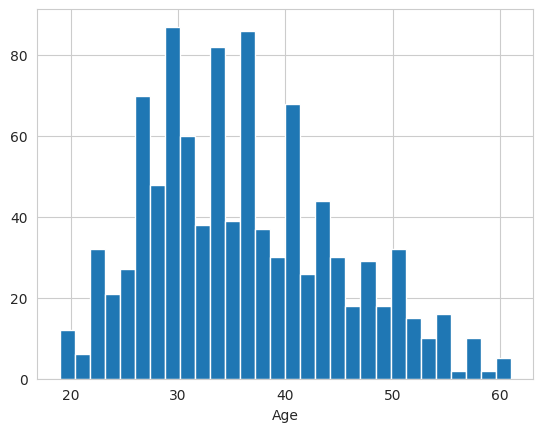

In [13]:
# Seaborn is a Python data visualization library based on matplotlib.
# Set the aesthetic style of the plots.
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

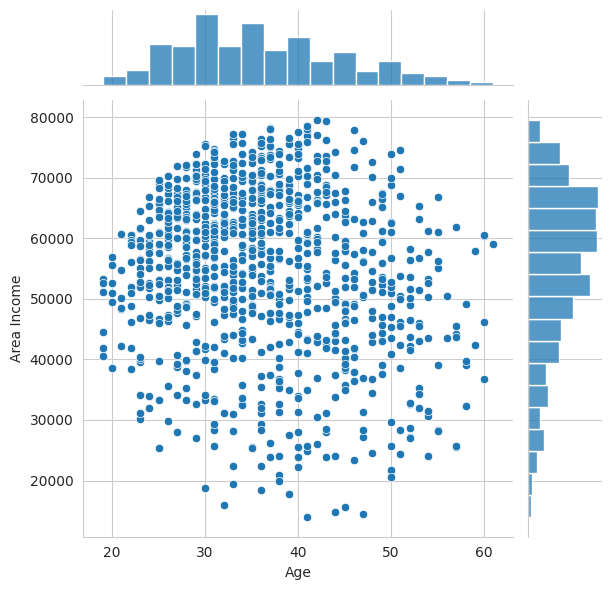

In [14]:
# Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as
# 1D profiles (univariate) in the margins.
sns.jointplot(x='Age',y='Area Income',data=ad_data)

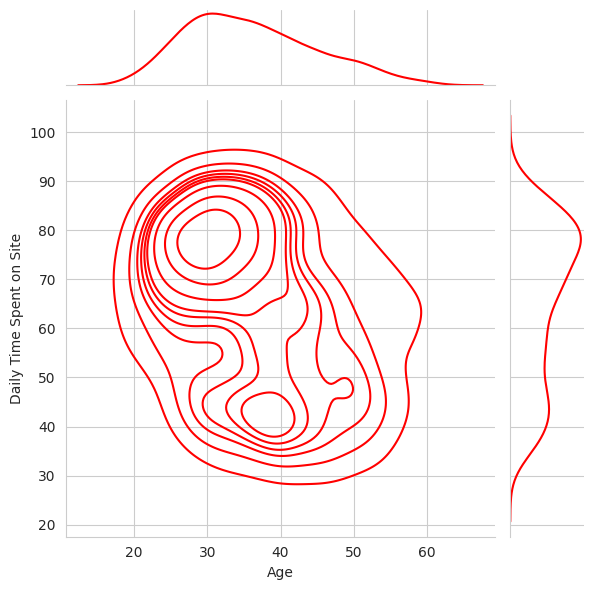

In [15]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');


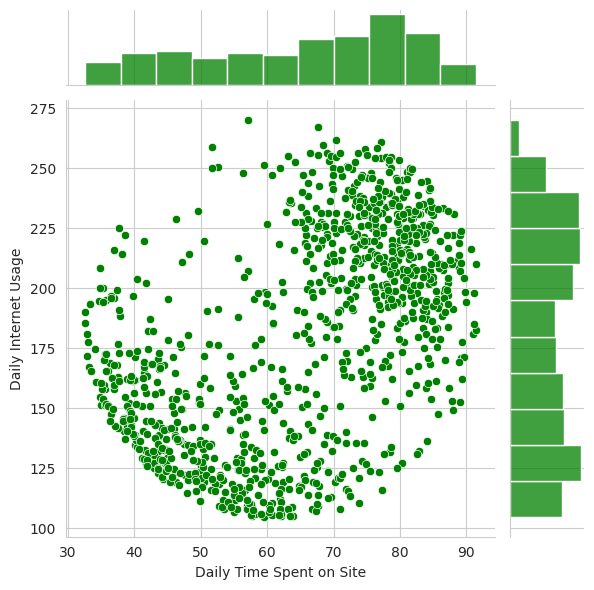

In [16]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')


In [17]:
# `train_test_split` is a function in Sklearn model selection for splitting data arrays into two subsets:
# for training data and for testing data.
# With this function, you don't need to divide the dataset manually.
# By default, Sklearn `train_test_split` will make random partitions for the two subsets.
# However, you can also specify a random state for the operation.
from sklearn.model_selection import train_test_split


X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification.
# It is easy to implement and can be used as the baseline for any binary classification problem.
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=500)